In [1]:
from astropy.table import *
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from astropy.table import hstack
import os

import matplotlib
plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

In [ ]:
# 

In [4]:
dev_path = '/Users/lejay/research/lephare_dev/my_code/'
output_dir = dev_path+'output_cats/'

In [11]:
# with nzprior
cat_output_13_withprior = Table.read(output_dir+'cat_out_il_nzprior_13bands.fits')
cat_output_15_withprior = Table.read(output_dir+'cat_out_il_nzprior.fits')

# without nzprior
cat_output_13 = Table.read(output_dir+'cat_out_il_13bands.fits')
cat_output_15 = Table.read(output_dir+'cat_out_il.fits')

cat_output_15 = cat_output_15['Z_BEST']
cat_output_13 = cat_output_13 ['Z_BEST']
cat_output_15_withprior = cat_output_15_withprior['Z_BEST']

In [12]:
cat_output = hstack([cat_output_15, cat_output_13],table_names=['15','13'])
cat_output_withprior = hstack([cat_output_15_withprior, cat_output_13_withprior],table_names=['prior_15','prior_13'])
cat_output = hstack([cat_output,cat_output_withprior])

In [24]:
cond_ch1 = (cat_output['MAG_AUTO_CH1_CORR']<20.5) & (cat_output['MAG_AUTO_CH1_CORR']>-90)
cond_ch2 = (cat_output['MAG_AUTO_CH2_CORR']<20.5) & (cat_output['MAG_AUTO_CH2_CORR']>-90)

In [30]:
cat_output.info

<Table masked=True length=5000>
        name          dtype 
-------------------- -------
           Z_BEST_15 float64
           Z_BEST_13 float64
     Z_BEST_prior_15 float64
                  ID   int64
                  RA float64
                 DEC float64
                MASK   int16
                 FUV float64
                 NUV float64
                   u float64
                  uS float64
                   g float64
                   r float64
                   i float64
                   z float64
                   y float64
                  Yv float64
                   J float64
                   H float64
                  Ks float64
             FUV_err float64
             NUV_err float64
               u_err float64
              uS_err float64
               g_err float64
               r_err float64
               i_err float64
               z_err float64
               y_err float64
              Yv_err float64
               J_err float64
           

In [32]:
# match the output catalog with COSMOS2020 and save to disk

cat_output_name = output_dir+'cat_out_13and15_prior_check.fits'
cat_c20_name = '/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits'
combined_cat_name = output_dir+'cat_out_13and15il_cosmosadded.fits'
join = '1and2'

# matching cat_output and cat_c20
cmd = 'java -jar stilts.jar tmatch2 in1='+cat_output_name + \
                ' in2='+cat_c20_name+' find=best join='+join+' matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000 DELTA_J2000" out='+combined_cat_name
print(cmd)
os.system(cmd)

java -jar stilts.jar tmatch2 in1=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_13and15_prior_check.fits in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000 DELTA_J2000" out=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_13and15il_cosmosadded.fits


0

In [33]:
cat_matched = Table.read(combined_cat_name)

In [35]:
cond_U = ( (cat_matched['u'] > 0.) & (cat_matched['u'] < 50.) & (cat_matched['u_err'] > 0.) & (cat_matched['u_err'] < 0.3) )| \
         ( (cat_matched['uS'] > 0.) & (cat_matched['uS'] < 50.) & (cat_matched['uS_err'] > 0.) & (cat_matched['uS_err'] < 0.3) )
cond_g = ( (cat_matched['g'] > 0.) & (cat_matched['g'] < 50.) & (cat_matched['g_err'] > 0.) & (cat_matched['g_err'] < 0.3) ) 
cond_r = ( (cat_matched['r'] > 0.) & (cat_matched['r'] < 50.) & (cat_matched['r_err'] > 0.) & (cat_matched['r_err'] < 0.3) )
cond_i = ( (cat_matched['i'] > 0.) & (cat_matched['i'] < 50.) & (cat_matched['i_err'] > 0.) & (cat_matched['i_err'] < 0.3) )
cond_z = ( (cat_matched['z'] > 0.) & (cat_matched['z'] < 50.) & (cat_matched['z_err'] > 0.) & (cat_matched['z_err'] < 0.3) )
cond_y = ( (cat_matched['y'] > 0.) & (cat_matched['y'] < 50.) & (cat_matched['y_err'] > 0.) & (cat_matched['y_err'] < 0.3) )
flag_optical = cond_U.astype(int) + cond_g.astype(int) + cond_r.astype(int) + cond_i.astype(int) + cond_z.astype(int) + cond_y.astype(int)

cond_Y = ( (cat_matched['Yv'] > 0.) & (cat_matched['Yv'] < 50.) & (cat_matched['Yv_err'] > 0.) & (cat_matched['Yv_err'] < 0.3) )
cond_J = ( (cat_matched['J'] > 0.) & (cat_matched['J'] < 50.) & (cat_matched['J_err'] > 0.) & (cat_matched['J_err'] < 0.3) )
cond_H = ( (cat_matched['H'] > 0.) & (cat_matched['H'] < 50.) & (cat_matched['H_err'] > 0.) & (cat_matched['H_err'] < 0.3) )
cond_Ks = ( (cat_matched['Ks'] > 0.) & (cat_matched['Ks'] < 50.) & (cat_matched['Ks_err'] > 0.) & (cat_matched['Ks_err'] < 0.3) )
flag_nir = cond_Y.astype(int) + cond_J.astype(int) + cond_H.astype(int) + cond_Ks.astype(int)

cond_ch1 = ( (cat_matched['MAG_AUTO_CH1'] > 0.) & (cat_matched['MAG_AUTO_CH1'] < 50.) & (cat_matched['MAGERR_AUTO_CH1'] > 0.) & (cat_matched['MAGERR_AUTO_CH1'] < 0.5) )
cond_ch2 = ( (cat_matched['MAG_AUTO_CH2'] > 0.) & (cat_matched['MAG_AUTO_CH2'] < 50.) & (cat_matched['MAGERR_AUTO_CH2'] > 0.) & (cat_matched['MAGERR_AUTO_CH2'] < 0.5) )
flag_irac = cond_ch1.astype(int) + cond_ch2.astype(int) 

cond_massive_c20 = (cat_matched['lp_mass_med']>11.3)
cond_massive_v = (cat_matched['MASS_MED']>11.3)
print(len(cat_matched))

2484


13
0.15384615384615385
0.15384615384615385


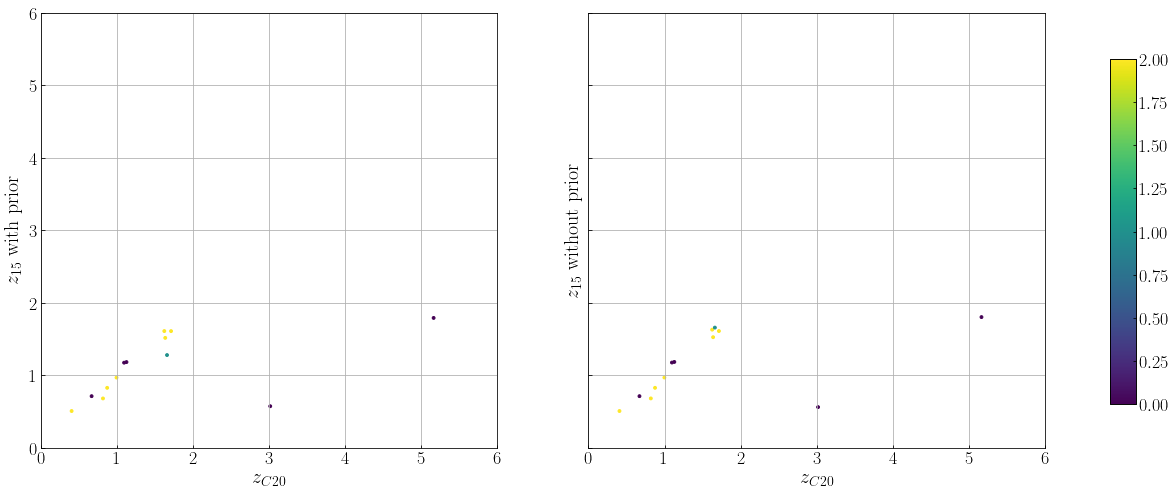

In [70]:
# cat_select = cat_matched[(flag_nir==0) & (flag_irac>=2)]
cat_select = cat_matched[cond_massive_c20]
print(len(cat_select))

fig, axs = plt.subplots(1, 2, figsize = (18, 8),sharex=True, sharey=True)
im = axs[0].scatter(cat_select['lp_zPDF'],cat_select['Z_BEST_prior_15'],s=8,c=flag_irac[cond_massive_c20],marker='o')
axs[1].scatter(cat_select['lp_zPDF'],cat_select['Z_BEST_15'],s=8,c=flag_irac[cond_massive_c20],marker='o')

outlier_factor = 0.15
print(len(cat_select[abs(cat_select['lp_zPDF']-cat_select['Z_BEST_prior_15'])>outlier_factor*(1+cat_select['lp_zPDF'])])/len(cat_select))
print(len(cat_select[abs(cat_select['lp_zPDF']-cat_select['Z_BEST_15'])>outlier_factor*(1+cat_select['lp_zPDF'])])/len(cat_select))

axs[0].set_xlim([0,6])
axs[0].set_ylim([0,6])
axs[0].set_xlabel('$z_{C20}$ ',fontsize=20)
axs[0].set_ylabel('$z_{15}$ with prior',fontsize=20)
axs[1].set_xlabel('$z_{C20}$ ',fontsize=20)
axs[1].set_ylabel('$z_{15}$ without prior',fontsize=20)

axs[0].grid()
axs[1].grid()
cb_ax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cbar = fig.colorbar(im, cax=cb_ax)
cbar = fig.colorbar(im, cax=cb_ax)

1192
0.2625838926174497
0.2634228187919463


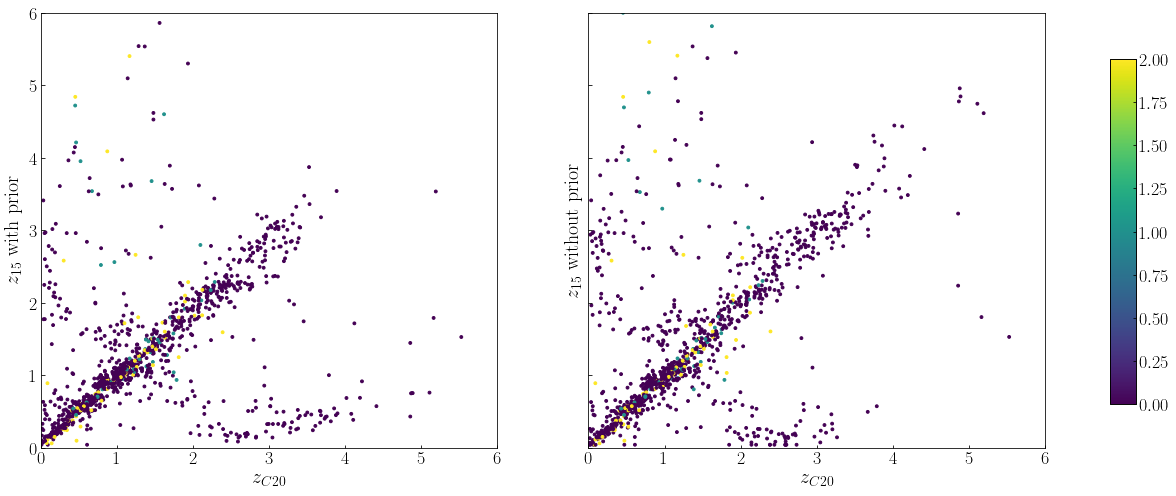

In [67]:
cat_select = cat_matched[(flag_nir==0)]
print(len(cat_select))

fig, axs = plt.subplots(1, 2, figsize = (18, 8),sharex=True, sharey=True)
im = axs[0].scatter(cat_select['lp_zPDF'],cat_select['Z_BEST_prior_15'],s=8,c=flag_irac[(flag_nir==0)],marker='o')
axs[1].scatter(cat_select['lp_zPDF'],cat_select['Z_BEST_15'],s=8,c=flag_irac[(flag_nir==0)],marker='o')

outlier_factor = 0.15
print(len(cat_select[abs(cat_select['lp_zPDF']-cat_select['Z_BEST_prior_15'])>outlier_factor*(1+cat_select['lp_zPDF'])])/len(cat_select))
print(len(cat_select[abs(cat_select['lp_zPDF']-cat_select['Z_BEST_15'])>outlier_factor*(1+cat_select['lp_zPDF'])])/len(cat_select))

axs[0].set_xlim([0,6])
axs[0].set_ylim([0,6])
axs[0].set_xlabel('$z_{C20}$ ',fontsize=20)
axs[0].set_ylabel('$z_{15}$ with prior',fontsize=20)
axs[1].set_xlabel('$z_{C20}$ ',fontsize=20)
axs[1].set_ylabel('$z_{15}$ without prior',fontsize=20)

cb_ax = fig.add_axes([0.95, 0.2, 0.02, 0.6])
cbar = fig.colorbar(im, cax=cb_ax)
cbar = fig.colorbar(im, cax=cb_ax)

In [31]:
# remove C20 duplicated columns
cat_output.write(output_dir+'cat_out_13and15_prior_check.fits',overwrite=True)

#### Forbidden CONTEXT

In [89]:
cosmos_v9 = Table.read('clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v9_gal_cut_params_sfq_added.fits')
inside_j=cosmos_v9['inside_j']

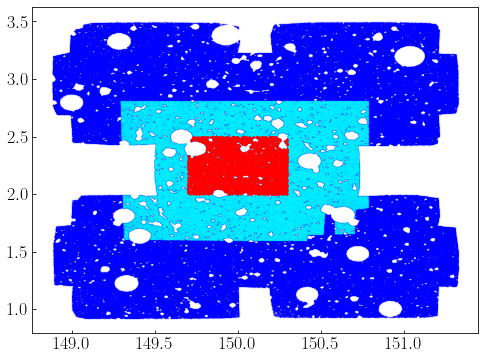

In [128]:
fig, axs = plt.subplots(1, 1, figsize = (8, 6),sharex=True, sharey=True)
cat_output_full_name = output_dir+'cat_out_15band_il.fits'
cat_output = Table.read(cat_output_full_name)
plt.scatter(cosmos_v9['RA'],cosmos_v9 ['DEC'],s=0.1,alpha=0.1,c='b')
plt.scatter(cosmos_v9[inside_j]['RA'],cosmos_v9[inside_j]['DEC'],s=0.1,alpha=0.1,c='cyan')
plt.scatter(cat_output['RA'],cat_output['DEC'],s=1,color='r')

In [273]:
# the output catalogs
cat_output_no_irac_nir_name = output_dir+'cat_out_noniriracil.fits'
cat_output_no_irac_name = output_dir+'cat_out_noirac_il.fits'
cat_output_no_nir_name = output_dir+'cat_out_nonir_il.fits'
cat_output_full_name = output_dir+'cat_out_15band_il.fits'

cat_names = [cat_output_no_irac_nir_name, cat_output_no_irac_name, cat_output_no_nir_name, cat_output_full_name]
filter_selections = ['no nir\&irac','no irac / with nir','no nir / with irac','full']
print(len(cat_output))

10000


In [274]:
# matching with COSMOS2020 and COSMOS_V11_6band_masses

for i,cat_name in enumerate(cat_names):    
    cat_output_name = cat_name; print(cat_name)
    cat_c20_name = '/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits'
    combined_cat_name = cat_output_name.replace('.fits','c20added.fits')
    join = '1and2'
    
    col_list = "'RA DEC MASS_MED'"
    cmd = 'java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0\
       in1='+cat_output_name+' values1="RA DEC" \
       in2='+cat_c20_name+' values2="ALPHA_J2000 DELTA_J2000" \
       in3=/Volumes/LejaySSD/v11_cats/COSMOS6bandesv11_bc03_zphot.fits values3="RA DEC" \
       out='+ combined_cat_name+' icmd3="keepcols '+col_list+'" '
    print(cmd)
    os.system(cmd)
    
    if i==0:
        cat_matched = Table.read(combined_cat_name)
        cat_matched.rename_column('MASS_MED','MASS_MED_v')
        cat_matched.rename_column('MASS_MED_3','MASS_MED_v6b')
        cond_U = ( (cat_matched['u'] > 0.) & (cat_matched['u'] < 50.) & (cat_matched['u_err'] > 0.) & (cat_matched['u_err'] < 0.3) )| \
                 ( (cat_matched['uS'] > 0.) & (cat_matched['uS'] < 50.) & (cat_matched['uS_err'] > 0.) & (cat_matched['uS_err'] < 0.3) )
        cond_g = ( (cat_matched['g'] > 0.) & (cat_matched['g'] < 50.) & (cat_matched['g_err'] > 0.) & (cat_matched['g_err'] < 0.3) ) 
        cond_r = ( (cat_matched['r'] > 0.) & (cat_matched['r'] < 50.) & (cat_matched['r_err'] > 0.) & (cat_matched['r_err'] < 0.3) )
        cond_i = ( (cat_matched['i'] > 0.) & (cat_matched['i'] < 50.) & (cat_matched['i_err'] > 0.) & (cat_matched['i_err'] < 0.3) )
        cond_z = ( (cat_matched['z'] > 0.) & (cat_matched['z'] < 50.) & (cat_matched['z_err'] > 0.) & (cat_matched['z_err'] < 0.3) )
        cond_y = ( (cat_matched['y'] > 0.) & (cat_matched['y'] < 50.) & (cat_matched['y_err'] > 0.) & (cat_matched['y_err'] < 0.3) )
        flag_optical = cond_U.astype(int) + cond_g.astype(int) + cond_r.astype(int) + cond_i.astype(int) + cond_z.astype(int) + cond_y.astype(int)

        cond_Y = ( (cat_matched['Yv'] > 0.) & (cat_matched['Yv'] < 50.) & (cat_matched['Yv_err'] > 0.) & (cat_matched['Yv_err'] < 0.3) )
        cond_J = ( (cat_matched['J'] > 0.) & (cat_matched['J'] < 50.) & (cat_matched['J_err'] > 0.) & (cat_matched['J_err'] < 0.3) )
        cond_H = ( (cat_matched['H'] > 0.) & (cat_matched['H'] < 50.) & (cat_matched['H_err'] > 0.) & (cat_matched['H_err'] < 0.3) )
        cond_Ks = ( (cat_matched['Ks'] > 0.) & (cat_matched['Ks'] < 50.) & (cat_matched['Ks_err'] > 0.) & (cat_matched['Ks_err'] < 0.3) )
        flag_nir = cond_Y.astype(int) + cond_J.astype(int) + cond_H.astype(int) + cond_Ks.astype(int)

        cond_ch1 = ( (cat_matched['MAG_AUTO_CH1'] > 0.) & (cat_matched['MAG_AUTO_CH1'] < 50.) & (cat_matched['MAGERR_AUTO_CH1'] > 0.) & (cat_matched['MAGERR_AUTO_CH1'] < 0.5) )
        cond_ch2 = ( (cat_matched['MAG_AUTO_CH2'] > 0.) & (cat_matched['MAG_AUTO_CH2'] < 50.) & (cat_matched['MAGERR_AUTO_CH2'] > 0.) & (cat_matched['MAGERR_AUTO_CH2'] < 0.5) )
        flag_irac = cond_ch1.astype(int) + cond_ch2.astype(int) 
        
        cond_all = np.ones(len(cat_matched)).astype(bool)
        cond_massive_c20 = (cat_matched['lp_mass_med']>11.3)
        cond_massive_v = (cat_matched['MASS_MED_v6b']>11.3)
        cond_fake_massive = (cat_matched['MASS_MED_v6b']>11.3) & (cat_matched['lp_mass_med']<10.8)
        flag_list = [flag_optical,flag_nir,flag_irac,flag_nir]
        flag_name_list = ['flag optical','flag nir','flag irac',' flag nir']
    

/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noniriracil.fits
java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noniriracil.fits values1="RA DEC"        in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits values2="ALPHA_J2000 DELTA_J2000"        in3=/Volumes/LejaySSD/v11_cats/COSMOS6bandesv11_bc03_zphot.fits values3="RA DEC"        out=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noniriracilc20added.fits icmd3="keepcols 'RA DEC MASS_MED'" 
/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noirac_il.fits
java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noirac_il.fits values1="RA DEC"        in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits values2="ALPHA_J2000 DELTA_J2000"        in3

Number of objects: 9993


/Users/lejay/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:988: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)


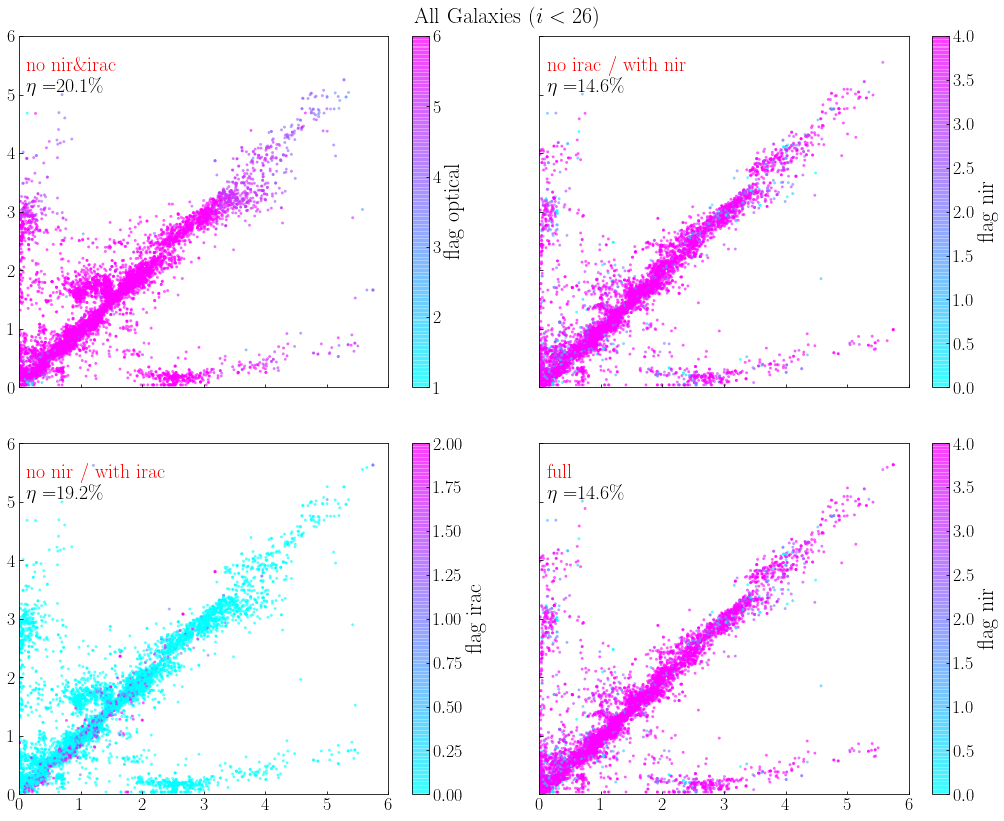

In [211]:
fig, axs = plt.subplots(2, 2, figsize = (15, 12),sharex=True, sharey=True)
for i,cat_name in enumerate(cat_names):
    row = i // 2
    col = i % 2
    cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
    
    cond = np.ones(len(cat_output_c20added)).astype(bool)
    if i==0: print('Number of objects:',len(cond[cond]))
    
    im = axs[row][col].scatter(cat_output_c20added[cond]['lp_zPDF'],cat_output_c20added[cond]['Z_BEST'],s=4,c=flag_list[i][cond],alpha=0.5,cmap='cool')
    axs[row][col].set_xlim([0,6])
    axs[row][col].set_ylim([0,6])
    
    cbar = fig.colorbar(im, ax=axs[row][col])
    cbar.ax.set_ylabel(flag_name_list[i],fontsize=22)
    
    # print out outlier fraction
    outlier_factor = 0.15
    num_outliers_15 = len(cat_output_c20added[cond][abs(cat_output_c20added[cond]['lp_zPDF']-cat_output_c20added[cond]['Z_BEST'])>outlier_factor*(1+cat_output_c20added[cond]['lp_zPDF'])])
    
    axs[row][col].annotate(filter_selections[i],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='r')
    axs[row][col].annotate('$\eta=$'+str(round(num_outliers_15/len(cat_output_c20added[cond]),3)*100)+'\%',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=20,color='k')
    
plt.suptitle('All Galaxies ($i<26$)',fontsize=22)
plt.tight_layout(pad=4)

Number of objects: 22


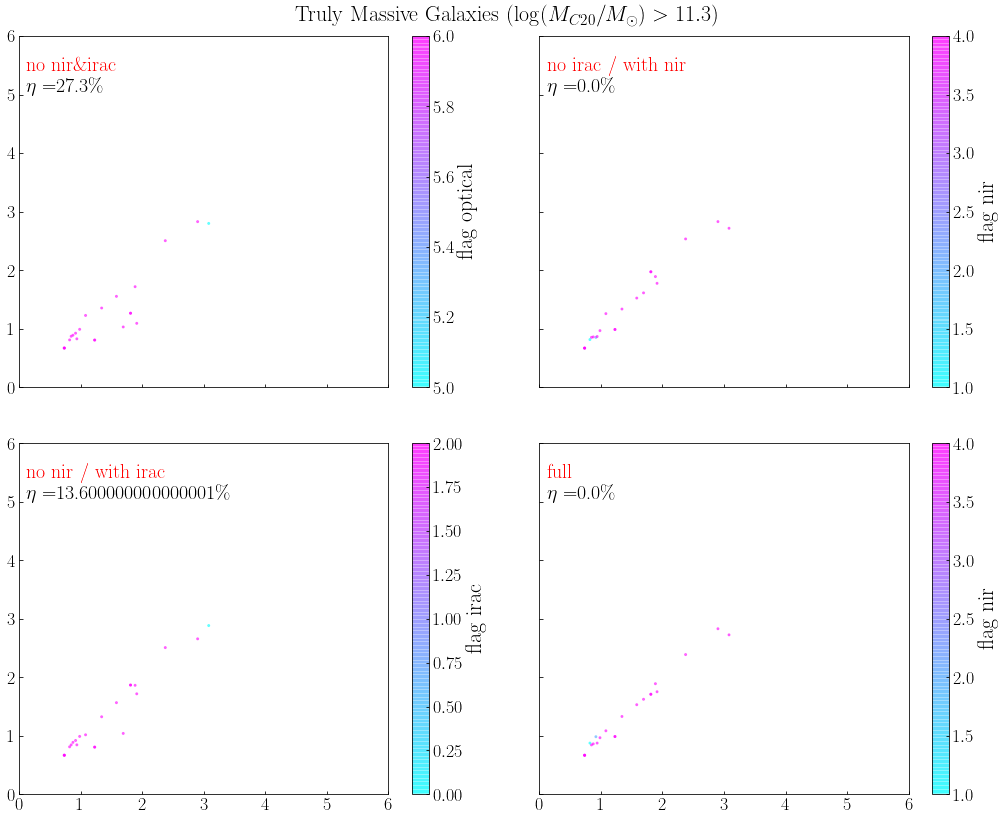

In [214]:
fig, axs = plt.subplots(2, 2, figsize = (15, 12),sharex=True, sharey=True)
for i,cat_name in enumerate(cat_names):
    row = i // 2
    col = i % 2
    cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
    
    cond = cond_massive_c20
    if i==0: print('Number of objects:',len(cond[cond]))
    
    im = axs[row][col].scatter(cat_output_c20added[cond]['lp_zPDF'],cat_output_c20added[cond]['Z_BEST'],s=4,c=flag_list[i][cond],alpha=0.5,cmap='cool')
    axs[row][col].set_xlim([0,6])
    axs[row][col].set_ylim([0,6])
    
    cbar = fig.colorbar(im, ax=axs[row][col])
    cbar.ax.set_ylabel(flag_name_list[i],fontsize=22)
    
    # print out outlier fraction
    outlier_factor = 0.15
    num_outliers_15 = len(cat_output_c20added[cond][abs(cat_output_c20added[cond]['lp_zPDF']-cat_output_c20added[cond]['Z_BEST'])>outlier_factor*(1+cat_output_c20added[cond]['lp_zPDF'])])
    
    axs[row][col].annotate(filter_selections[i],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='r')
    axs[row][col].annotate('$\eta=$'+str(round(num_outliers_15/len(cat_output_c20added[cond]),3)*100)+'\%',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=20,color='k')
    
plt.suptitle(r'Truly Massive Galaxies ($\log(M_{C20}/M_\odot)>11.3$)',fontsize=22)
plt.tight_layout(pad=4)


Number of objects: 52


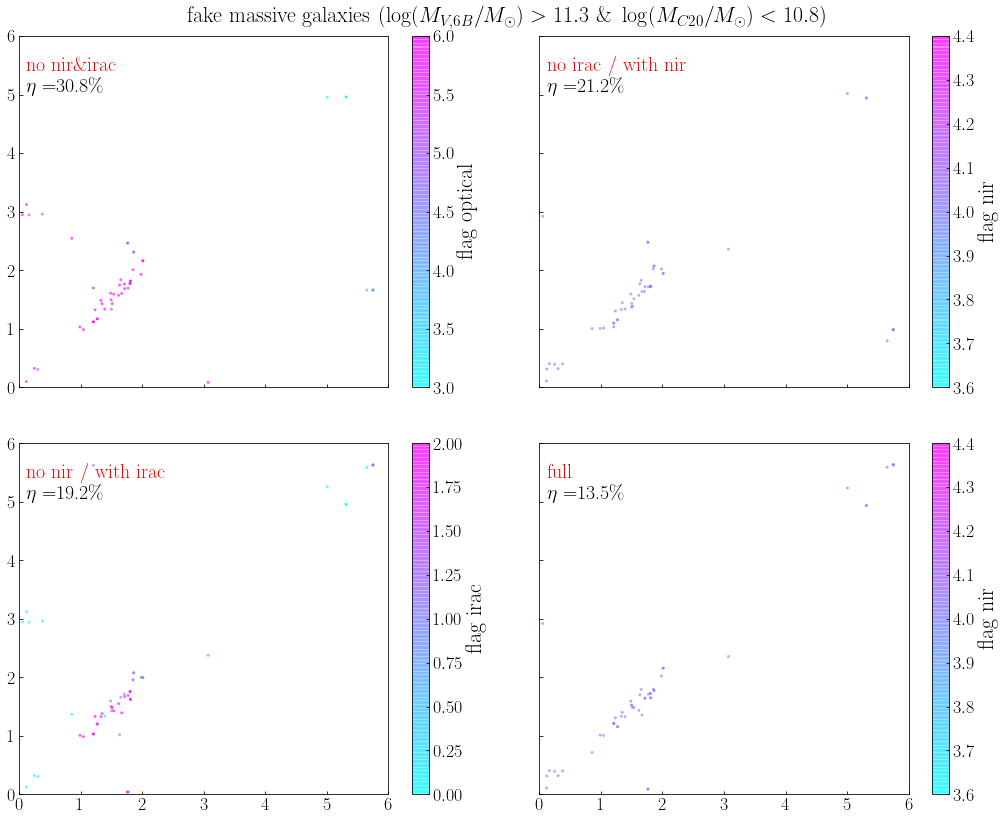

In [218]:
fig, axs = plt.subplots(2, 2, figsize = (15, 12),sharex=True, sharey=True)
for i,cat_name in enumerate(cat_names):
    row = i // 2
    col = i % 2
    cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
    
    cond = cond_fake_massive
    if i==0: print('Number of objects:',len(cond[cond]))
    
    im = axs[row][col].scatter(cat_output_c20added[cond]['lp_zPDF'],cat_output_c20added[cond]['Z_BEST'],s=4,c=flag_list[i][cond],alpha=0.5,cmap='cool')
    axs[row][col].set_xlim([0,6])
    axs[row][col].set_ylim([0,6])
    cbar = fig.colorbar(im, ax=axs[row][col])
    cbar.ax.set_ylabel(flag_name_list[i],fontsize=22)
    
    # print out outlier fraction
    outlier_factor = 0.15
    num_outliers_15 = len(cat_output_c20added[cond][abs(cat_output_c20added[cond]['lp_zPDF']-cat_output_c20added[cond]['Z_BEST'])>outlier_factor*(1+cat_output_c20added[cond]['lp_zPDF'])])
    
    axs[row][col].annotate(filter_selections[i],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='r')
    axs[row][col].annotate('$\eta=$'+str(round(num_outliers_15/len(cat_output_c20added[cond]),3)*100)+'\%',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=20,color='k')
    
plt.suptitle('fake massive galaxies ($\log(M_{V,6B}/M_\odot)>11.3 ~ \& ~ \log(M_{C20}/M_\odot)<10.8$)',fontsize=22)
plt.tight_layout(pad=4)

#### mass comparison plots

In [305]:
# the output catalogs
cat_output_no_irac_nir_mass_name = output_dir+'cat_out_noniriracil_formass.fits'
cat_output_no_irac_mass_name = output_dir+'cat_out_noirac_il_formass.fits'
cat_output_no_nir_mass_name = output_dir+'cat_out_nonir_il_formass.fits'
cat_output_full_mass_name = output_dir+'cat_out_15band_il_formass.fits'

cat_names = [cat_output_no_irac_nir_mass_name, cat_output_no_irac_mass_name, cat_output_no_nir_mass_name, cat_output_full_mass_name]
filter_selections = ['no nir\&irac','no irac / with nir','no nir / with irac','full']
print(len(cat_output))

10000


In [306]:
for i,cat_name in enumerate(cat_names):    
    cat_output_name = cat_name; print(cat_name)
    cat_c20_name = '/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits'
    combined_cat_name = cat_output_name.replace('.fits','c20added.fits')
    join = '1and2'
    
    col_list = "'RA DEC MASS_MED'"
    cmd = 'java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0\
       in1='+cat_output_name+' values1="RA DEC" \
       in2='+cat_c20_name+' values2="ALPHA_J2000 DELTA_J2000" \
       in3=/Volumes/LejaySSD/v11_cats/COSMOS6bandesv11_bc03_zphot.fits values3="RA DEC" \
       out='+ combined_cat_name+' icmd3="keepcols '+col_list+'" '
    print(cmd)
    os.system(cmd)
    
    if i==0:
        cat_matched = Table.read(combined_cat_name)
        cond_U = ( (cat_matched['u'] > 0.) & (cat_matched['u'] < 50.) & (cat_matched['u_err'] > 0.) & (cat_matched['u_err'] < 0.3) )| \
                 ( (cat_matched['uS'] > 0.) & (cat_matched['uS'] < 50.) & (cat_matched['uS_err'] > 0.) & (cat_matched['uS_err'] < 0.3) )
        cond_g = ( (cat_matched['g'] > 0.) & (cat_matched['g'] < 50.) & (cat_matched['g_err'] > 0.) & (cat_matched['g_err'] < 0.3) ) 
        cond_r = ( (cat_matched['r'] > 0.) & (cat_matched['r'] < 50.) & (cat_matched['r_err'] > 0.) & (cat_matched['r_err'] < 0.3) )
        cond_i = ( (cat_matched['i'] > 0.) & (cat_matched['i'] < 50.) & (cat_matched['i_err'] > 0.) & (cat_matched['i_err'] < 0.3) )
        cond_z = ( (cat_matched['z'] > 0.) & (cat_matched['z'] < 50.) & (cat_matched['z_err'] > 0.) & (cat_matched['z_err'] < 0.3) )
        cond_y = ( (cat_matched['y'] > 0.) & (cat_matched['y'] < 50.) & (cat_matched['y_err'] > 0.) & (cat_matched['y_err'] < 0.3) )
        flag_optical = cond_U.astype(int) + cond_g.astype(int) + cond_r.astype(int) + cond_i.astype(int) + cond_z.astype(int) + cond_y.astype(int)

        cond_Y = ( (cat_matched['Yv'] > 0.) & (cat_matched['Yv'] < 50.) & (cat_matched['Yv_err'] > 0.) & (cat_matched['Yv_err'] < 0.3) )
        cond_J = ( (cat_matched['J'] > 0.) & (cat_matched['J'] < 50.) & (cat_matched['J_err'] > 0.) & (cat_matched['J_err'] < 0.3) )
        cond_H = ( (cat_matched['H'] > 0.) & (cat_matched['H'] < 50.) & (cat_matched['H_err'] > 0.) & (cat_matched['H_err'] < 0.3) )
        cond_Ks = ( (cat_matched['Ks'] > 0.) & (cat_matched['Ks'] < 50.) & (cat_matched['Ks_err'] > 0.) & (cat_matched['Ks_err'] < 0.3) )
        flag_nir = cond_Y.astype(int) + cond_J.astype(int) + cond_H.astype(int) + cond_Ks.astype(int)

        cond_ch1 = ( (cat_matched['MAG_AUTO_CH1'] > 0.) & (cat_matched['MAG_AUTO_CH1'] < 50.) & (cat_matched['MAGERR_AUTO_CH1'] > 0.) & (cat_matched['MAGERR_AUTO_CH1'] < 0.5) )
        cond_ch2 = ( (cat_matched['MAG_AUTO_CH2'] > 0.) & (cat_matched['MAG_AUTO_CH2'] < 50.) & (cat_matched['MAGERR_AUTO_CH2'] > 0.) & (cat_matched['MAGERR_AUTO_CH2'] < 0.5) )
        flag_irac = cond_ch1.astype(int) + cond_ch2.astype(int) 
        
        cond_all = np.ones(len(cat_matched)).astype(bool)
        cond_massive_c20 = (cat_matched['lp_mass_med']>11.3)
        cond_massive_myrun = (cat_matched['MASS_MED_massrun']>11.3)
        cond_fake_massive = (cat_matched['MASS_MED_massrun']>11.3) & (cat_matched['lp_mass_med']<10.8)
        flag_list = [flag_optical,flag_nir,flag_irac,flag_nir]
        flag_name_list = ['flag optical','flag nir','flag irac',' flag nir']
    

/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noniriracil_formass.fits
java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noniriracil_formass.fits values1="RA DEC"        in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits values2="ALPHA_J2000 DELTA_J2000"        in3=/Volumes/LejaySSD/v11_cats/COSMOS6bandesv11_bc03_zphot.fits values3="RA DEC"        out=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noniriracil_formassc20added.fits icmd3="keepcols 'RA DEC MASS_MED'" 
/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noirac_il_formass.fits
java -jar stilts.jar tmatchn multimode=pairs nin=3 matcher=sky params=1.0       in1=/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noirac_il_formass.fits values1="RA DEC"        in2=/Volumes/LejaySSD/COSMOS2020/COSMOS2020_CLASSIC_R1_v2.0_15bands_photoz_added.fits valu

/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noniriracil_formassc20added.fits
Number of objects: 72
/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noirac_il_formassc20added.fits
/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_nonir_il_formassc20added.fits
/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_15band_il_formassc20added.fits


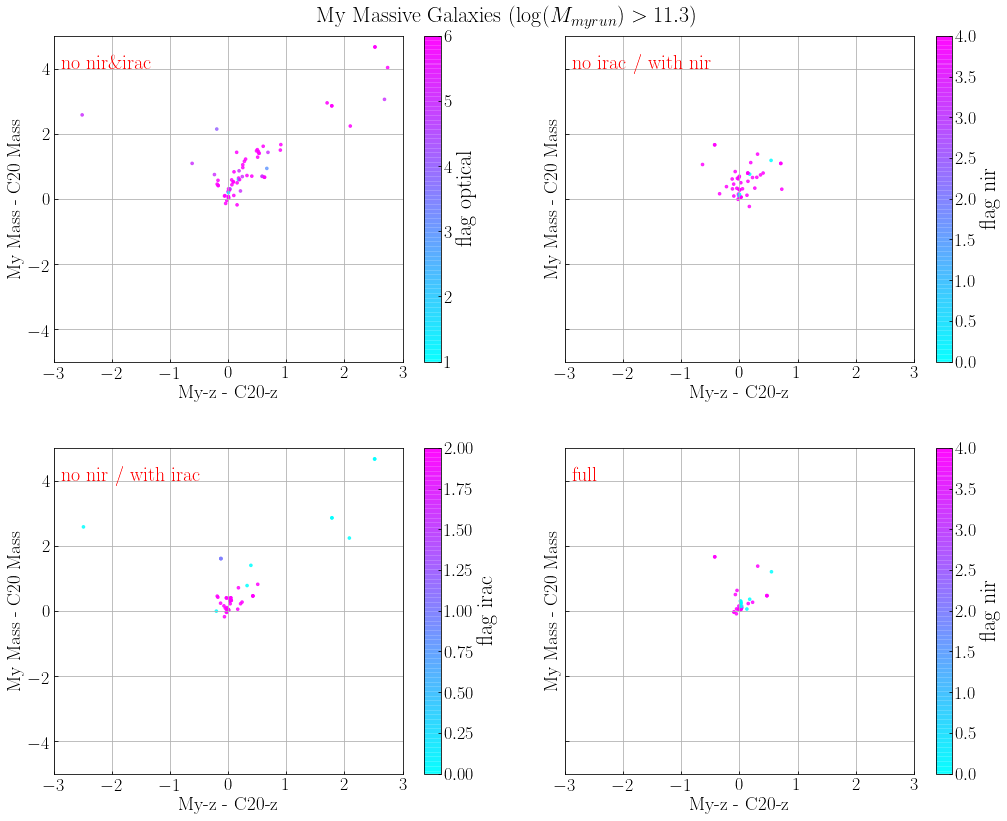

In [337]:
fig, axs = plt.subplots(2, 2, figsize = (15, 12),sharey=True)
for i,cat_name in enumerate(cat_names):
    row = i // 2
    col = i % 2
    cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
    print(cat_name.replace('.fits','c20added.fits'))
#     print(cat_output_c20added.info)
    cond = cat_output_c20added['MASS_MED_massrun']>11.3
    if i==0: print('Number of objects:',len(cond[cond]))
    
    im = axs[row][col].scatter(cat_output_c20added[cond]['Z_ML']-cat_output_c20added[cond]['lp_zPDF'],cat_output_c20added[cond]['MASS_MED_massrun']-cat_output_c20added[cond]['lp_mass_med'],s=7,c=flag_list[i][cond],alpha=0.8,cmap='cool')
    axs[row][col].set_xlim([-3,3])
    axs[row][col].set_ylim([-5,5])
    axs[row][col].set_xlabel('My-z - C20-z',fontsize=19)
    axs[row][col].set_ylabel('My Mass - C20 Mass',fontsize=19)
    axs[row][col].grid()
    cbar = fig.colorbar(im, ax=axs[row][col])
    cbar.ax.set_ylabel(flag_name_list[i],fontsize=22)
    
    # print out outlier fraction
    outlier_factor = 0.15
    num_outliers_15 = len(cat_output_c20added[cond][abs(cat_output_c20added[cond]['lp_zPDF']-cat_output_c20added[cond]['Z_BEST'])>outlier_factor*(1+cat_output_c20added[cond]['lp_zPDF'])])
    
    axs[row][col].annotate(filter_selections[i],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='r')
#     axs[row][col].annotate('$\eta=$'+str(round(num_outliers_15/len(cat_output_c20added[cond]),3)*100)+'\%',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=20,color='k')
    
#     fig_title = 'All Galaxies ($i<26$)'
#     fig_title = 'Truly Massive Galaxies ($\log(M_{C20})>11.3$)'
    fig_title = 'My Massive Galaxies ($\log(M_{myrun})>11.3$)'
#     fig_title = 'Fake Massive Galaxies ($\log(M_{my-run}/M_\odot)>11.3 ~ \& ~ \log(M_{C20}/M_\odot)<10.8$)'
#     fig_title = ''
    
plt.suptitle(fig_title,fontsize=22)
plt.tight_layout(pad=4)


/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noniriracil_formassc20added.fits
Number of objects: 41
/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noirac_il_formassc20added.fits
/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_nonir_il_formassc20added.fits
/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_15band_il_formassc20added.fits


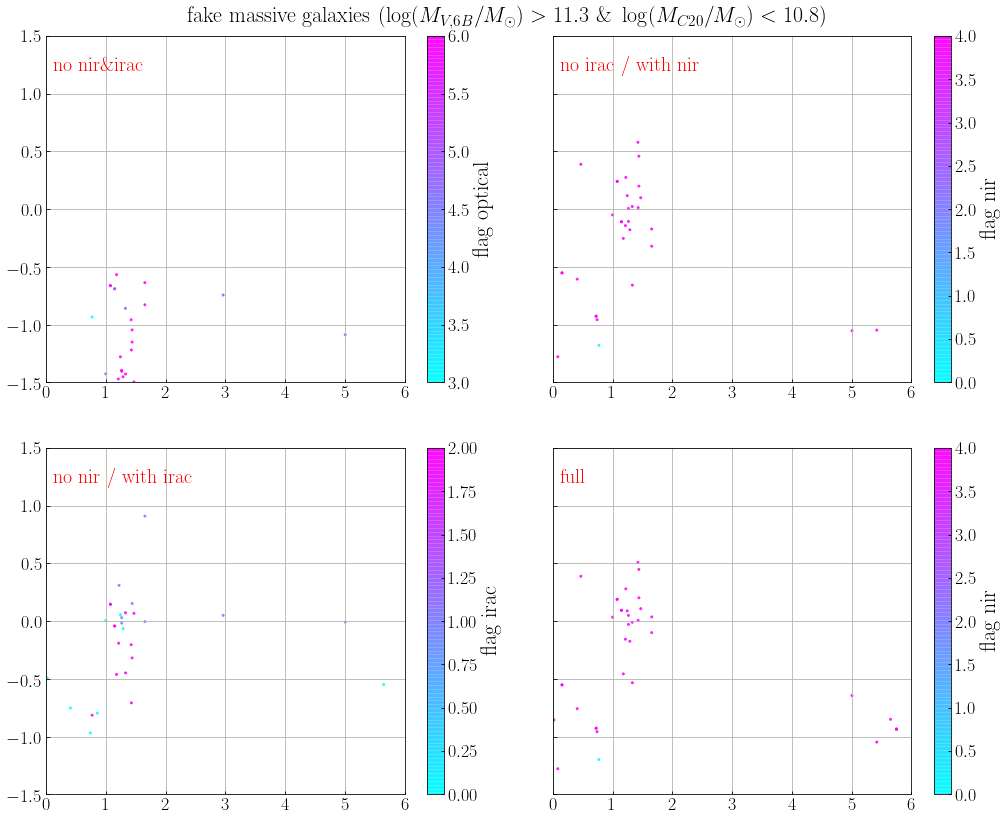

In [320]:
fig, axs = plt.subplots(2, 2, figsize = (15, 12), sharey=True)
for i,cat_name in enumerate(cat_names):
    row = i // 2
    col = i % 2
    cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
    print(cat_name.replace('.fits','c20added.fits'))
#     print(cat_output_c20added.info)
    cond = cond_fake_massive
    if i==0: print('Number of objects:',len(cond[cond]))
    
    im = axs[row][col].scatter(cat_output_c20added[cond]['lp_zPDF'],cat_output_c20added[cond]['lp_mass_med']-cat_output_c20added[cond]['MASS_MED_massrun'],s=4,c=flag_list[i][cond],alpha=0.8,cmap='cool')
    axs[row][col].set_xlim([0,6])
    axs[row][col].set_ylim([-1.5,1.5])
    axs[row][col].grid()
    cbar = fig.colorbar(im, ax=axs[row][col])
    cbar.ax.set_ylabel(flag_name_list[i],fontsize=22)
    
    # print out outlier fraction
    outlier_factor = 0.15
    num_outliers_15 = len(cat_output_c20added[cond][abs(cat_output_c20added[cond]['lp_zPDF']-cat_output_c20added[cond]['Z_BEST'])>outlier_factor*(1+cat_output_c20added[cond]['lp_zPDF'])])
    
    axs[row][col].annotate(filter_selections[i],xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='r')
#     axs[row][col].annotate('$\eta=$'+str(round(num_outliers_15/len(cat_output_c20added[cond]),3)*100)+'\%',xy=([0.02,0.84]),xycoords='axes fraction',fontsize=20,color='k')
    
plt.suptitle('fake massive galaxies ($\log(M_{V,6B}/M_\odot)>11.3 ~ \& ~ \log(M_{C20}/M_\odot)<10.8$)',fontsize=22)
plt.tight_layout(pad=4)

/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noniriracil_formassc20added.fits
/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_noirac_il_formassc20added.fits
/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_nonir_il_formassc20added.fits
/Users/lejay/research/lephare_dev/my_code/output_cats/cat_out_15band_il_formassc20added.fits


Text(0, 0.5, 'flag irac')

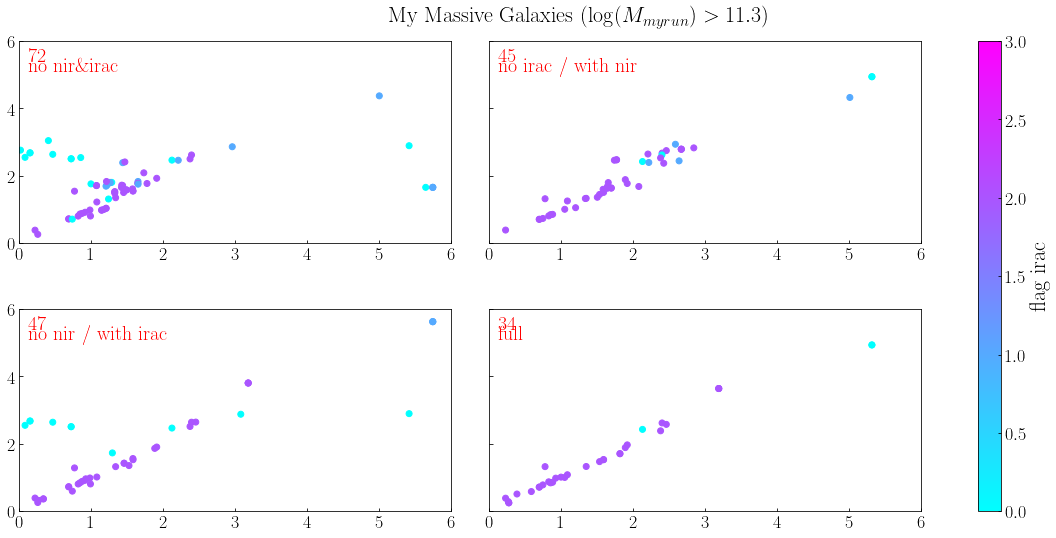

In [330]:
fig, axs = plt.subplots(2, 2, figsize = (17, 8), sharey=True)
for i,cat_name in enumerate(cat_names):
    row = i // 2
    col = i % 2
    cat_output_c20added = Table.read(cat_name.replace('.fits','c20added.fits'))
    print(cat_name.replace('.fits','c20added.fits'))
    
    cat_output_c20added_massive_myrun = cat_output_c20added[cat_output_c20added['MASS_MED_massrun']>11.3]
    axs[row][col].annotate(filter_selections[i],xy=([0.02,0.85]),xycoords='axes fraction',fontsize=20,color='r')
    axs[row][col].annotate(len(cat_output_c20added_massive_myrun),xy=([0.02,0.9]),xycoords='axes fraction',fontsize=20,color='r')
    im = axs[row][col].scatter(cat_output_c20added_massive_myrun['lp_zPDF'],cat_output_c20added_massive_myrun['Z_BEST'],vmin=0,vmax=3,c=flag_irac[cat_output_c20added['MASS_MED_massrun']>11.3],cmap='cool')
    
#     axs[row][col].hist(cat_output_c20added_massive_myrun['lp_mass_med'],range=(6,13),bins=40)
    axs[row][col].set_xlim([0,6])
    axs[row][col].set_ylim([0,6])

fig_title = 'My Massive Galaxies ($\log(M_{myrun})>11.3$)'
plt.suptitle(fig_title, fontsize=22)
plt.tight_layout(pad=4)
cbar = fig.colorbar(im, ax=axs)
cbar.ax.set_ylabel(r'flag irac',fontsize=22)

In [304]:
27*17*16*6/0.05

881280.0